
# Tools for simulating frequency and volume of alerts / objects, probabilities of alerts belonging to known object, probability of alert belonging to object in cache of given size

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from variableclass import *

# Create all classes trying to reproduce figure 13 from Ridgway et al. 2014

In [2]:
# create individual class rates (exponential models)
MBA = variableclass(label = "MBA", color = 'g', N0 = 4e5, N1 = 1e1, t1 = 3.7)
stars = variableclass(label = "stars", color = 'b', N0 = 1e5, N1 = 1e1, t1 = 2.7)
stars.addcomponent(N0 = 1.2e5, invtau = 1. / 0.1)
CVs = variableclass(label = "CVs", color = 'brown', N0 = 3e3, N1 = 1.5e3, t1 = 5.)
AGNs = variableclass(label = "AGN", color = 'orange', N0 = 2e3, N1 = 8e1, t1 = 4.)
QSOs = variableclass(label = "QSOs", color = 'r', N0 = 2e2, N1 = 8e1, t1 = 4.)
QSOs.addcomponent(N0 = 7e3, N1 = 8e1, t1 = 0.3)
QSOs.addcomponent(N0 = 2e3, N1 = 5e1, t1 = 1.5)
SNe = variableclass(label = "SNe", color = 'violet', N0 = 1.2e3, invtau = 0)
Mflares = variableclass(label = "M-flares", color = 'lightblue', N0 = 8e1, invtau = 0)

# create list of allclasses to build class of all alerts
allclasses = [MBA, stars, CVs, SNe, AGNs, QSOs, Mflares]
for idx, var in enumerate(allclasses):
    if idx == 0:
        allalerts = variableclass(label = "all", color = 'k', obj = var)    
    else:
        allalerts.addcomponent(obj = var)
    if idx == 1:
        allnonMBA = variableclass(label = 'all non MBA', color = 'gray', obj = var)
    elif idx > 1:
        allnonMBA.addcomponent(obj = var)

# include class of all alerts among all variable classes
allclasses = [allalerts, allnonMBA] + allclasses

### Plot rates of new alerts (alerts corresponding to new objects) for all 

Note that this figure does not predict 10 million objects as usually discussed, but a factor of ~20 less

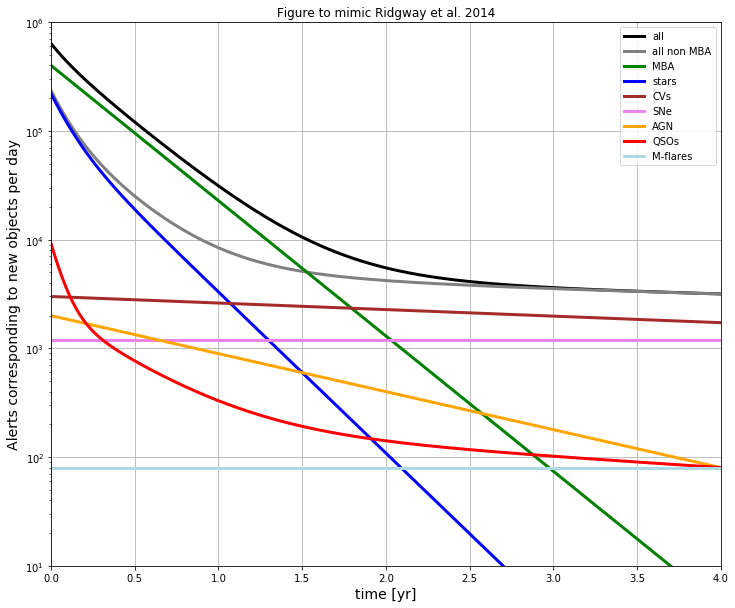

In [3]:
times = np.logspace(-3, 1, 1000)
fig, ax = plt.subplots(figsize = (12, 10))
for var in allclasses:
    ax.plot(times, var.doratenew(times), label = var.label, color = var.color, lw = 3)
ax.set_xlabel("time [yr]", fontsize = 14)
ax.set_ylabel("Alerts corresponding to new objects per day", fontsize = 14)
ax.set_yscale("log")
ax.set_ylim(1e1, 1e6)
ax.set_xlim(0, 4)
ax.set_title("Figure to mimic Ridgway et al. 2014")
ax.grid()
ax.legend()
plt.savefig('plots/ratesnew.png')

### Cumulative number for all alerts / objects

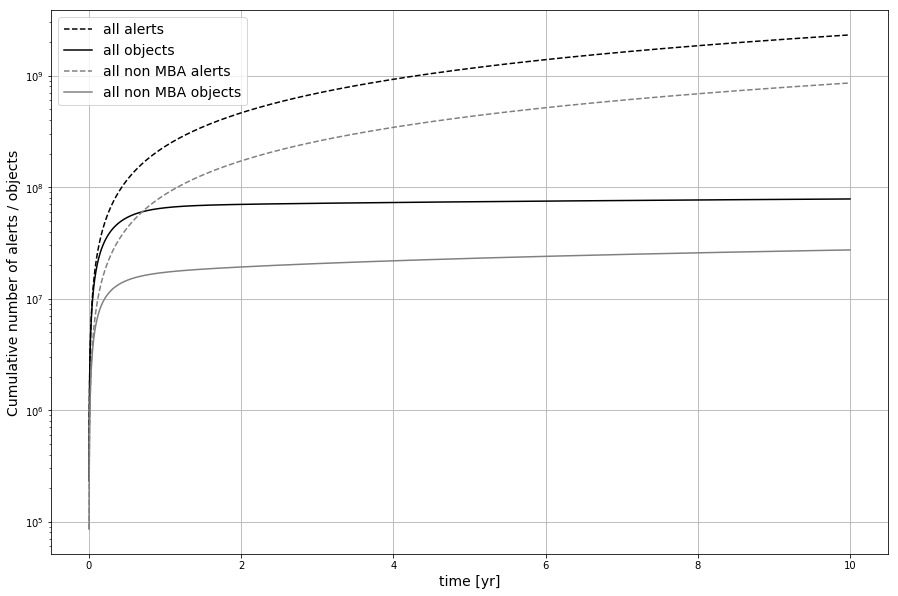

In [4]:
fig, ax = plt.subplots(figsize = (15, 10))
for var in [allalerts, allnonMBA]:
    ax.plot(times, var.documulativeall(times), label = "%s alerts" % var.label, c = var.color, ls = '--')
    ax.plot(times, var.documulativenew(times), label = "%s objects" % var.label, c = var.color)
ax.set_xlabel("time [yr]", fontsize = 14)
ax.set_ylabel("Cumulative number of alerts / objects", fontsize = 14)
ax.set_yscale("log")
#ax.set_ylim(1e1, 1e6)
ax.grid()
ax.legend(fontsize = 14)
plt.savefig('plots/cumulativeall.png')

### Cumulative number for all alerts / objects separated by class

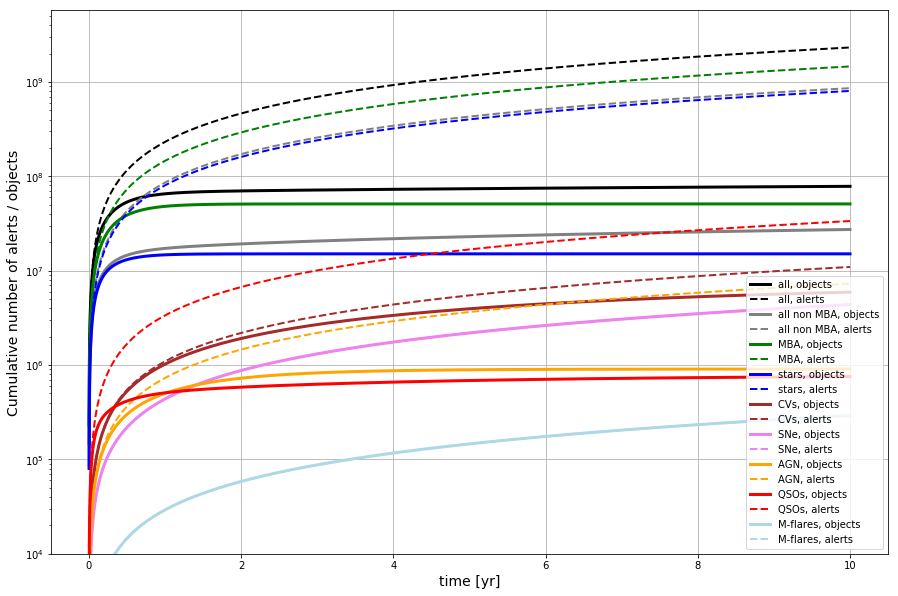

In [5]:
fig, ax = plt.subplots(figsize = (15, 10))
for var in allclasses:
    ax.plot(times, var.documulativenew(times), label = "%s, objects" % var.label, color = var.color, lw = 3)
    ax.plot(times, var.documulativeall(times), label = "%s, alerts" % var.label, color = var.color, ls = "--", lw = 2)
ax.set_xlabel("time [yr]", fontsize = 14)
ax.set_ylabel("Cumulative number of alerts / objects", fontsize = 14)
ax.set_yscale("log")
ax.set_ylim(1e4, ax.get_ylim()[1])
ax.grid()
ax.legend()
plt.savefig('plots/cumulativedetail.png')

### Probability of an alert corresponding to a new / known object

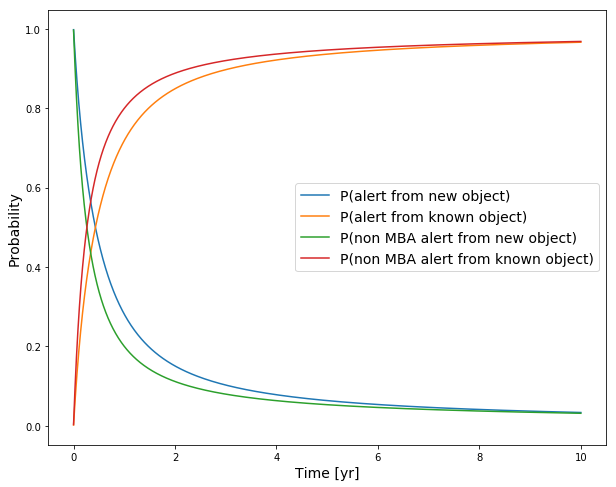

In [6]:
fig, ax = plt.subplots(figsize = (10, 8))
ax.plot(times, allalerts.probnew(times), label = "P(alert from new object)")
ax.plot(times, 1. - allalerts.probnew(times), label = "P(alert from known object)")
ax.plot(times, allnonMBA.probnew(times), label = "P(non MBA alert from new object)")
ax.plot(times, 1. - allnonMBA.probnew(times), label = "P(non MBA alert from known object)")
ax.set_xlabel("Time [yr]", fontsize = 14)
ax.set_ylabel("Probability", fontsize = 14)
ax.legend(fontsize = 14)
plt.savefig('plots/probnew.png')

### Probability of alert in given cache size

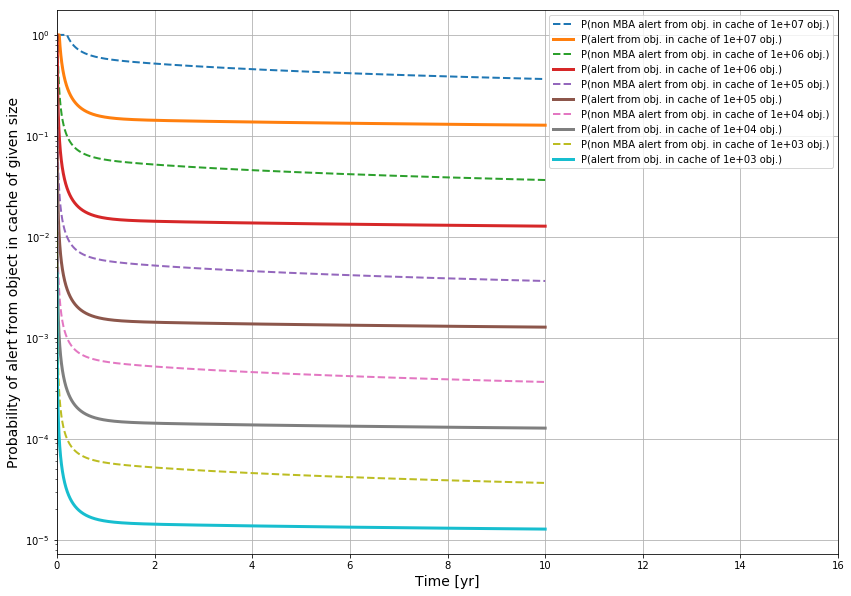

In [7]:
fig, ax = plt.subplots(figsize = (14, 10))
for cachesize in [1e7, 1e6, 1e5, 1e4, 1e3]: # number of alerts in cache
    ax.plot(times, allnonMBA.probobjincache(times, cachesize), label = "P(non MBA alert from obj. in cache of %2.0e obj.)" % cachesize, ls = '--', lw = 2)
    ax.plot(times, allalerts.probobjincache(times, cachesize), label = "P(alert from obj. in cache of %2.0e obj.)" % cachesize, lw = 3)
ax.set_xlabel("Time [yr]", fontsize = 14)
ax.set_ylabel("Probability of alert from object in cache of given size", fontsize = 14)
ax.set_yscale('log')
ax.set_xlim(0, 16)
ax.grid()
ax.legend()
plt.savefig("plots/probscache.png")

### Size of annotation batch given annotation time to match rate of new objects
batch size / annotation time = rate of new objects

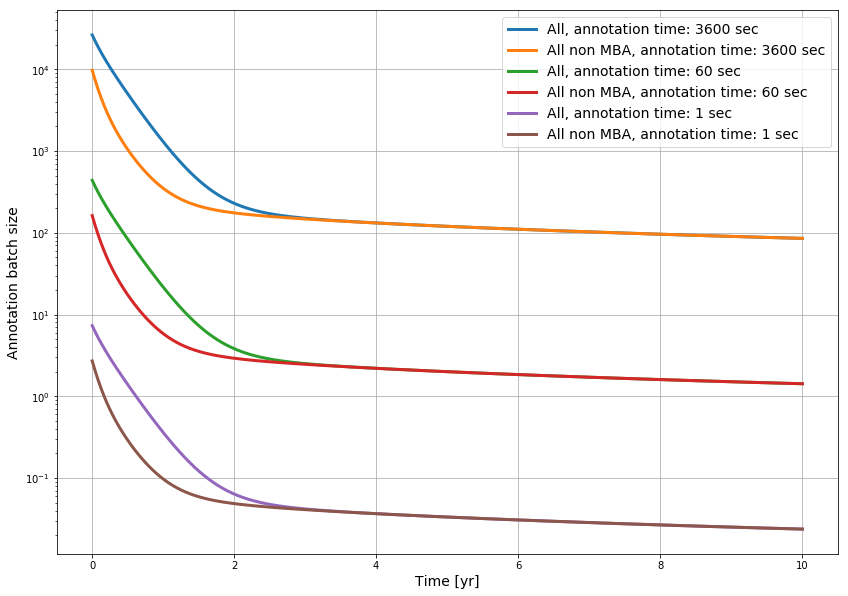

In [8]:
fig, ax = plt.subplots(figsize = (14, 10))
for annotationtime in [3600, 60, 1]: # number of alerts in cache
    ax.plot(times, allalerts.annotationbatchsize(times, annotationtime), label = "All, annotation time: %i sec" % annotationtime, lw = 3)
    ax.plot(times, allnonMBA.annotationbatchsize(times, annotationtime), label = "All non MBA, annotation time: %i sec" % annotationtime, lw = 3)
ax.set_xlabel("Time [yr]", fontsize = 14)
ax.set_ylabel("Annotation batch size", fontsize = 14)
ax.set_yscale('log')
ax.grid()
ax.legend(fontsize = 14)
plt.savefig("plots/annotationbatch.png")